In [1]:
############ Plot Box and Whisker Plots of Percent of ###################################
##### Suspended Sediment that is Locally Suspended Over Time ############################
# The purpose of this script is to make plots that have one box and whisker plot for 
# each shelf section that has the range of percentages of locally resuspended 
# sediment in that section over time. 
#
# Notes:
# - This leaves out the rivers that are no longer in the 2020 model
#   runs that use Blaskey river data 
#########################################################################################

In [2]:
# Load in the packages 
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import transforms 
from matplotlib import cm, ticker
from glob import glob
import cmocean
#import matplotlib.ticker as tick
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.patches as mpatches


In [3]:
# Set a universal fontsize
fontsize = 20 # 25

# Set the tick size for all plots
matplotlib.rc('xtick', labelsize=fontsize) 
matplotlib.rc('ytick', labelsize=fontsize)

# Prevent tick labels from overlapping
matplotlib.rcParams['xtick.major.pad'] = 10 # 12
matplotlib.rcParams['ytick.major.pad'] = 10 # 12


In [4]:
# Load in the grid
grid = xr.open_dataset('/projects/brun1463/ROMS/Kakak3_Alpine/Include/KakAKgrd_shelf_big010_smooth006.nc')
#grid = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska_2019/Code/Grids/KakAKgrd_shelf_big010_smooth006.nc') # UPDATE PATH


# Pull out some dimensions
eta_rho_len = len(grid.eta_rho)
xi_rho_len = len(grid.xi_rho)
s_rho_len = int(20)
Nbed_len = 11

In [5]:
# Multiply by masks to make land appear 
# Make it so land will appear
temp_mask = grid.mask_rho.copy()
temp_mask = np.where(temp_mask==0, np.nan, temp_mask)

In [6]:
# Load in the rho masks 
mask_rho_nan = xr.open_dataset('/projects/brun1463/ROMS/Kakak3_Alpine/Scripts_2/Analysis/Nudge_masks/nudge_mask_rho_ones_nans.nc') # UPDATE PATH
mask_rho_zeros = xr.open_dataset('/projects/brun1463/ROMS/Kakak3_Alpine/Scripts_2/Analysis/Nudge_masks/nudge_mask_rho_zeros_ones.nc')
#mask_rho_nan = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska_2019/Code/Nudge_masks/nudge_mask_rho_ones_nans.nc')
#mask_rho_zeros = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska_2019/Code/Nudge_masks/nudge_mask_rho_zeros_ones.nc')


In [7]:
# Load in the river forcing file 
# -- Aggregated --
#river_frc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Beaufort_Shelf_Rivers_proj_002/Model_Input/Rivers/river_forcing_file_beaufort_shelf_13rivs_13seabed_radr_data_001.nc')
# (2020)
river_frc = xr.open_dataset('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Include/river_forcing_file_beaufort_shelf_10rivs_13seabed_blaskey_data_sagDSS3_rating_001.nc')
# -- Unaggregated (it is the same for now) --
#river_frc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Beaufort_Shelf_Rivers_proj_002/Model_Input/Rivers/river_forcing_file_beaufort_shelf_13rivs_13seabed_radr_data_003.nc')

In [8]:
# Make a list of labels in order
labels_tmp = ['Kalikpik', 'Fish Creek', 'Colville', 'Sakonowyak', 
          'Kuparuk', 'Putuligayuk', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Siksik', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12']

labels_tmp2 = ['Kalikpik', 'Colville', 'Sagavanirktok', 'Fish Creek', 'Sakonowyak', 
          'Kuparuk', 'Putuligayuk', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Siksik', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12']

labels_all_13rivs = ['Kalikpik', 'Fish Creek', 'Colville', 'Sakonowyak', 
          'Kuparik', 'Putuligayuk', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Siksik', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 6', 'Section 7', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12', 'Section 13']

# Same as above but with Putuligayuk, Sakonowyak, and Siksik removed
labels_all = ['Kalikpik', 'Fish Creek', 'Colville', 
          'Kuparik', 'Sagavanirktok', 'Staines', 'Canning', 'Katakturuk', 'Hulahula',
          'Jago', 'Section 1', 'Section 2', 'Section 3', 'Section 4',
          'Section 5', 'Section 6', 'Section 7', 'Section 8', 'Section 9', 'Section 10',
          'Section 11', 'Section 12', 'Section 13']


# Make a list of all colors in order (rivers then seabed sections)
#colors_tmp = ['r', 'brown', 'deepskyblue', 'orange', 'green', 'b', 'dodgerblue', 'gold',
 #               'darkorange', 'aquamarine', 'blueviolet', 'magenta', 'deeppink', 'cornflowerblue', 
  #              'lightsteelblue', 'sandybrown', 'forestgreen', 'orangered',
   #             'hotpink', 'pink', 'lightgray', 'yellowgreen',
     #                            'mediumturquoise']

# =============================================================================
# colors_all = ['r', 'brown', 'deepskyblue', 'orange', 'green', 'b', 'dodgerblue', 'gold',
#                 'darkorange', 'aquamarine', 'blueviolet', 'magenta', 'deeppink', 'cornflowerblue', 
#                 'lightsteelblue', 'sandybrown', 'forestgreen', 'orangered',
#                 'lightsalmon', 'sienna', 'hotpink', 'pink', 'lightgray', 'yellowgreen',
#                                  'mediumturquoise', 'powderblue' ]
# =============================================================================

# Make a list of seabed colors
seabed_colors = ['cornflowerblue', 'lightsteelblue', 'sandybrown', 'forestgreen', 'orangered',
                 'lightsalmon', 'sienna', 'hotpink', 'pink', 'lightgray', 'yellowgreen',
                 'mediumturquoise', 'powderblue']

# Make a list of colors for the rivers 
river_colors = ['r', 'brown', 'deepskyblue', 'orange', 'green', 'b', 'dodgerblue', 'gold',
                'darkorange', 'aquamarine', 'blueviolet', 'magenta', 'deeppink']

# Make list of colors to use for plots
seabed_section_colors = ['#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
                         '#E86DA6', '#FF925F', '#FFC863', '#785EF0', '#DC267F', 
                         '#FF6100', '#FFB000','#6490FF']
#river_marker_colors = ['#FC440F', '#00A6A6', '#5EF38C', '#26532B', '#0115F5',
               #        '#9C00A8', '#F43ECF', '#F5ED00']
river_marker_colors = ['#FC440F', '#F5ED00', '#5EF38C', '#26532B', '#F43ECF', '#9C00A8',
                       '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009', '#EA8D40']

# New colors tmp
# River Order: Kalikpik, Fish Creek, Colville, Sakonowyak, Kuparuk, Putuligayuk, 
# Sagavanirktok, Staines, Canning, Katakturuk, Hulahula, Jago, Siksik, 
# Section 1 ..., Section 13 (sections are in order)
colors_tmp_13rivs = ['#FC440F', '#F5ED00', '#5EF38C', '#26532B', '#F43ECF', '#9C00A8',
              '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009', '#EA8D40',
              '#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
              '#E86DA6', '#FF925F', '#FFC863', '#785EF0', '#DC267F',
              '#FF6100', '#FFB000','#6490FF'] 

# Same as above but with Putuligayuk, Sakonowyak, and Siksik removed 
colors_tmp = ['#FC440F', '#F5ED00', '#5EF38C', '#F43ECF',
              '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009',
              '#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
              '#E86DA6', '#FF925F', '#FFC863', '#785EF0', '#DC267F',
              '#FF6100', '#FFB000','#6490FF'] 


# New colors tmp2 - with colors for sections 6, 7, 13 removed since we are ignoring those for now
colors_tmp2 = ['#FC440F', '#F5ED00', '#5EF38C', '#26532B', '#F43ECF', '#9C00A8',
              '#0115F5', '#00A6A6', '#AB64EB', '#D44179', '#08E0E3', '#B27009', '#EA8D40',
              '#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
              '#FFC863', '#785EF0', '#DC267F',
              '#FF6100', '#FFB000']


In [9]:
# Load in the post-processed output
percent_local_unag = xr.open_dataset('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Scripts/Analysis/Percent_local_resuspension/percent_local_resuspended_over_time_unaggregated.nc') 

In [10]:
percent_local_unag

<xarray.Dataset> Size: 83kB
Dimensions:                                    (ocean_time: 738)
Coordinates:
  * ocean_time                                 (ocean_time) datetime64[ns] 6kB ...
Data variables: (12/13)
    percent_local_resuspended_over_time_sec1   (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec2   (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec3   (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec4   (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec5   (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec6   (ocean_time) float64 6kB ...
    ...                                         ...
    percent_local_resuspended_over_time_sec8   (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec9   (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec10  (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec11  (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec12  (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec13  (ocean_time) float64 6kB ...
Attributes:
    description:  Time-series ROMS output of percent of locally resuspended s...

In [11]:
# Make list of colors to use for plots
seabed_section_colors = ['#D1C8FB', '#F4B6D3', '#FFC8B0', '#FFE3B2', '#A190F4', 
                         '#E86DA6', '#FF925F', '#FFC863', '#785EF0', '#DC267F', 
                         '#FF6100', '#FFB000','#6490FF']

In [12]:
# Make labels
section_names_long = ['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Section 5', 
                 'Section 6', 'Section 7', 'Section 8', 'Section 9', 'Section 10',
                 'Section 11', 'Section 12', 'Section 13']
section_names_short = ['1', '2', '3', '4', '5', 
                 '6', '7', '8', '9', '10',
                 '11', '12', '13']

In [13]:
# Combine the data into a list
local_resusp_unag_all_sections = [percent_local_unag.percent_local_resuspended_over_time_sec1, percent_local_unag.percent_local_resuspended_over_time_sec2,
                             percent_local_unag.percent_local_resuspended_over_time_sec3, percent_local_unag.percent_local_resuspended_over_time_sec4,
                             percent_local_unag.percent_local_resuspended_over_time_sec5, percent_local_unag.percent_local_resuspended_over_time_sec6,
                             percent_local_unag.percent_local_resuspended_over_time_sec7, percent_local_unag.percent_local_resuspended_over_time_sec8,
                             percent_local_unag.percent_local_resuspended_over_time_sec9, percent_local_unag.percent_local_resuspended_over_time_sec10,
                             percent_local_unag.percent_local_resuspended_over_time_sec11, percent_local_unag.percent_local_resuspended_over_time_sec12,
                             percent_local_unag.percent_local_resuspended_over_time_sec13]

/projects/brun1463/code-server/tmp/ipykernel_1266083/3562086625.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['1', '2', '3', '4', '5',


Text(0.5, 1.0, 'Percent Locally \nResuspended - Unaggregated')

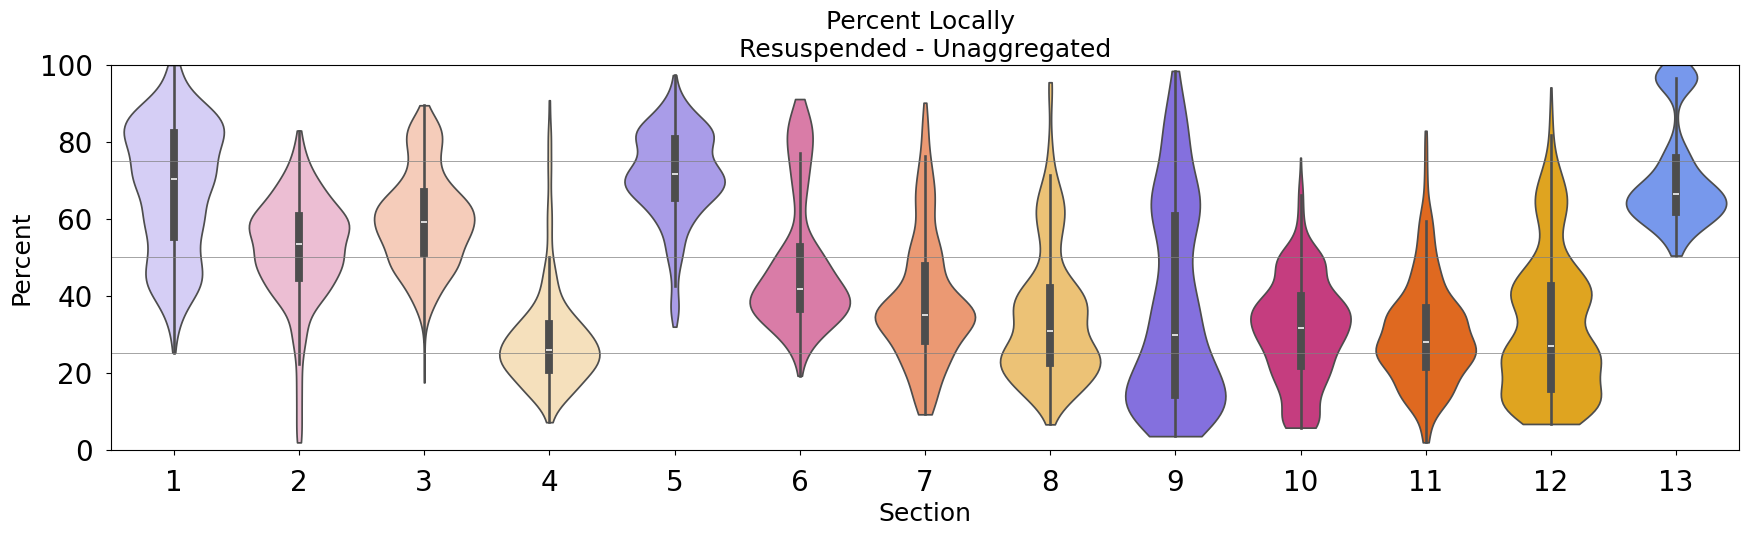

In [14]:
# Make the figure 
fig2, ax2 = plt.subplots(figsize=(21,5))

# Plot the data as violin plot
s2 = sns.violinplot(data=local_resusp_unag_all_sections, ax=ax2, palette=seabed_section_colors, cut=0)

# Set a ylim
ax2.set_ylim(0, 100)

# Add bars for 25, 50, 75 percent
ax2.axhline(y=0, linestyle='-', color='gray', linewidth=0.5)
ax2.axhline(y=25, linestyle='-', color='gray', linewidth=0.5)
ax2.axhline(y=50, linestyle='-', color='gray', linewidth=0.5)
ax2.axhline(y=75, linestyle='-', color='gray', linewidth=0.5)
ax2.axhline(y=100, linestyle='-', color='gray', linewidth=0.5)


# All
ax2.set_xticklabels(['1', '2', '3', '4', '5', 
                 '6', '7', '8', '9', '10',
                 '11', '12', '13'])
ax2.set_xlabel('Section', fontsize=fontsize-2)
ax2.set_ylabel('Percent', fontsize=fontsize-2)
ax2.set_title('Percent Locally \nResuspended - Unaggregated', fontsize=fontsize-2)


In [15]:
print(np.min(percent_local_unag.percent_local_resuspended_over_time_sec9))

<xarray.DataArray 'percent_local_resuspended_over_time_sec9' ()> Size: 8B
array(3.51713896)


/projects/brun1463/code-server/tmp/ipykernel_1266083/910189555.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['1', '2', '3', '4', '5',


Text(0.5, 1.0, 'Percent Locally Resuspended \nUnaggregated')

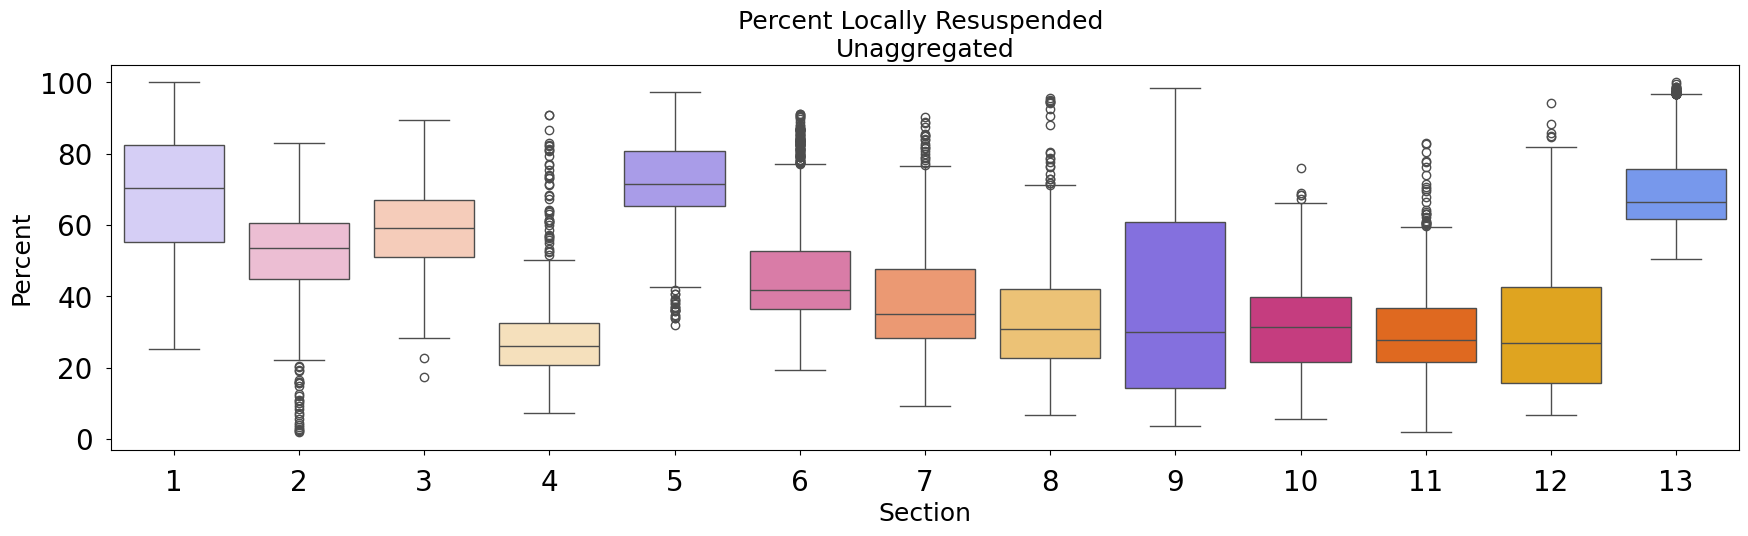

In [16]:
# Make the figure 
fig2, ax2 = plt.subplots(figsize=(21,5))

# Plot the data as a boxplot
s2 = sns.boxplot(data=local_resusp_unag_all_sections, ax=ax2, palette=seabed_section_colors)

# All
ax2.set_xticklabels(['1', '2', '3', '4', '5', 
                 '6', '7', '8', '9', '10',
                 '11', '12', '13'])

ax2.set_xlabel('Section', fontsize=fontsize-2)
ax2.set_ylabel('Percent', fontsize=fontsize-2)
ax2.set_title('Percent Locally Resuspended \nUnaggregated', fontsize=fontsize-2)


Text(0.5, 1.0, 'Time Series of Percent Local Resuspension - Unaggregated')

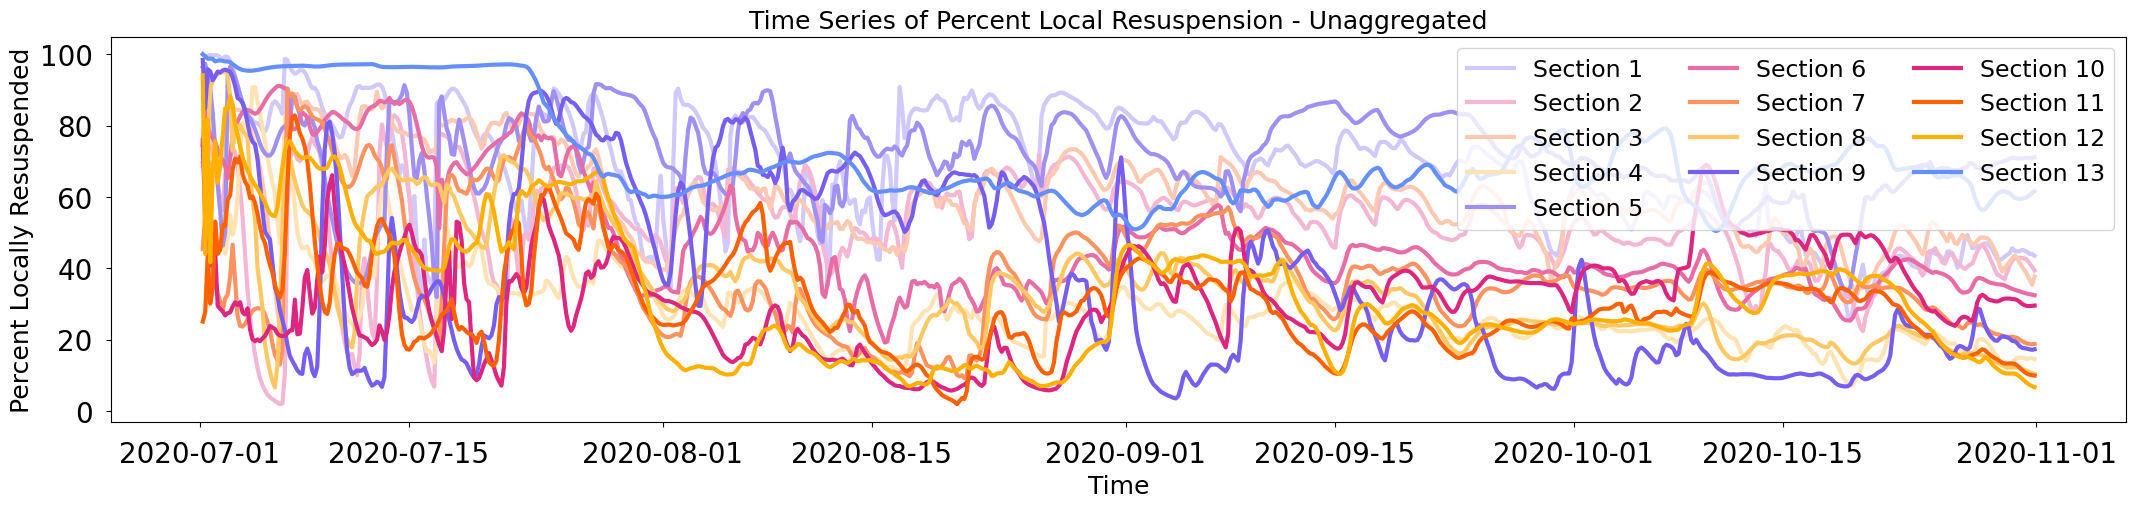

In [17]:
# Try to make a line plot for the sections 

# Make the figure 
fig2, ax2 = plt.subplots(figsize=(26,5))


# Plot each section as a line 
ax2.plot(percent_local_unag.ocean_time, percent_local_unag.percent_local_resuspended_over_time_sec1, color=seabed_section_colors[0], label=section_names_long[0], linewidth=3)
ax2.plot(percent_local_unag.ocean_time, percent_local_unag.percent_local_resuspended_over_time_sec2, color=seabed_section_colors[1], label=section_names_long[1], linewidth=3)
ax2.plot(percent_local_unag.ocean_time, percent_local_unag.percent_local_resuspended_over_time_sec3, color=seabed_section_colors[2], label=section_names_long[2], linewidth=3)
ax2.plot(percent_local_unag.ocean_time, percent_local_unag.percent_local_resuspended_over_time_sec4, color=seabed_section_colors[3], label=section_names_long[3], linewidth=3)
ax2.plot(percent_local_unag.ocean_time, percent_local_unag.percent_local_resuspended_over_time_sec5, color=seabed_section_colors[4], label=section_names_long[4], linewidth=3)
ax2.plot(percent_local_unag.ocean_time, percent_local_unag.percent_local_resuspended_over_time_sec6, color=seabed_section_colors[5], label=section_names_long[5], linewidth=3)
ax2.plot(percent_local_unag.ocean_time, percent_local_unag.percent_local_resuspended_over_time_sec7, color=seabed_section_colors[6], label=section_names_long[6], linewidth=3)
ax2.plot(percent_local_unag.ocean_time, percent_local_unag.percent_local_resuspended_over_time_sec8, color=seabed_section_colors[7], label=section_names_long[7], linewidth=3)
ax2.plot(percent_local_unag.ocean_time, percent_local_unag.percent_local_resuspended_over_time_sec9, color=seabed_section_colors[8], label=section_names_long[8], linewidth=3)
ax2.plot(percent_local_unag.ocean_time, percent_local_unag.percent_local_resuspended_over_time_sec10, color=seabed_section_colors[9], label=section_names_long[9], linewidth=3)
ax2.plot(percent_local_unag.ocean_time, percent_local_unag.percent_local_resuspended_over_time_sec11, color=seabed_section_colors[10], label=section_names_long[10], linewidth=3)
ax2.plot(percent_local_unag.ocean_time, percent_local_unag.percent_local_resuspended_over_time_sec12, color=seabed_section_colors[11], label=section_names_long[11], linewidth=3)
ax2.plot(percent_local_unag.ocean_time, percent_local_unag.percent_local_resuspended_over_time_sec13, color=seabed_section_colors[12], label=section_names_long[12], linewidth=3)



# Label the plot
ax2.set_xlabel('Time', fontsize=fontsize-2)
ax2.set_ylabel('Percent Locally Resuspended', fontsize=fontsize-2)
ax2.legend(fontsize=fontsize-3, ncol=3)
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set a title
ax2.set_title('Time Series of Percent Local Resuspension - Unaggregated', fontsize=fontsize-2)

In [18]:
# Load in the aggreagted run post-processed data
percent_local_agg = xr.open_dataset('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Scripts/Analysis/Percent_local_resuspension/percent_local_resuspended_over_time_aggregated.nc') 

In [19]:
percent_local_agg

<xarray.Dataset> Size: 83kB
Dimensions:                                    (ocean_time: 738)
Coordinates:
  * ocean_time                                 (ocean_time) datetime64[ns] 6kB ...
Data variables: (12/13)
    percent_local_resuspended_over_time_sec1   (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec2   (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec3   (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec4   (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec5   (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec6   (ocean_time) float64 6kB ...
    ...                                         ...
    percent_local_resuspended_over_time_sec8   (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec9   (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec10  (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec11  (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec12  (ocean_time) float64 6kB ...
    percent_local_resuspended_over_time_sec13  (ocean_time) float64 6kB ...
Attributes:
    description:  Time-series ROMS output of percent of locally resuspended s...

In [20]:
# Combine the data into a list
local_resusp_agg_all_sections = [percent_local_agg.percent_local_resuspended_over_time_sec1, percent_local_agg.percent_local_resuspended_over_time_sec2,
                             percent_local_agg.percent_local_resuspended_over_time_sec3, percent_local_agg.percent_local_resuspended_over_time_sec4,
                             percent_local_agg.percent_local_resuspended_over_time_sec5, percent_local_agg.percent_local_resuspended_over_time_sec6,
                             percent_local_agg.percent_local_resuspended_over_time_sec7, percent_local_agg.percent_local_resuspended_over_time_sec8,
                             percent_local_agg.percent_local_resuspended_over_time_sec9, percent_local_agg.percent_local_resuspended_over_time_sec10,
                             percent_local_agg.percent_local_resuspended_over_time_sec11, percent_local_agg.percent_local_resuspended_over_time_sec12,
                             percent_local_agg.percent_local_resuspended_over_time_sec13]

/projects/brun1463/code-server/tmp/ipykernel_1266083/2026234689.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['1', '2', '3', '4', '5',


Text(0.5, 1.0, 'Percent Locally \nResuspended - Aggregated')

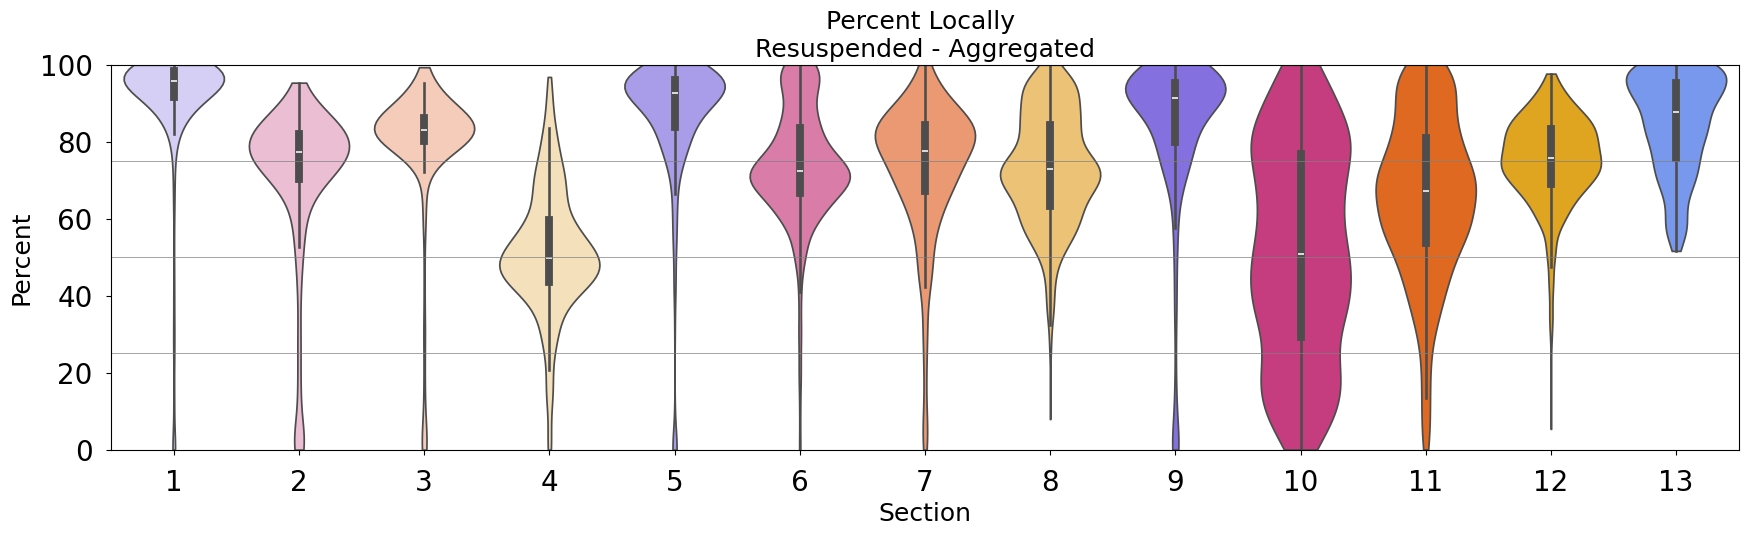

In [21]:
# Make the figure 
fig2, ax2 = plt.subplots(figsize=(21,5))

# Plot the data as violin plot
s2 = sns.violinplot(data=local_resusp_agg_all_sections, ax=ax2, palette=seabed_section_colors, cut=0)

# Set a ylim
ax2.set_ylim(0, 100)

# Add bars for 25, 50, 75 percent
ax2.axhline(y=0, linestyle='-', color='gray', linewidth=0.5)
ax2.axhline(y=25, linestyle='-', color='gray', linewidth=0.5)
ax2.axhline(y=50, linestyle='-', color='gray', linewidth=0.5)
ax2.axhline(y=75, linestyle='-', color='gray', linewidth=0.5)
ax2.axhline(y=100, linestyle='-', color='gray', linewidth=0.5)


# All
ax2.set_xticklabels(['1', '2', '3', '4', '5', 
                 '6', '7', '8', '9', '10',
                 '11', '12', '13'])
ax2.set_xlabel('Section', fontsize=fontsize-2)
ax2.set_ylabel('Percent', fontsize=fontsize-2)
ax2.set_title('Percent Locally \nResuspended - Aggregated', fontsize=fontsize-2)

/projects/brun1463/code-server/tmp/ipykernel_1266083/2497448868.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['1', '2', '3', '4', '5',


Text(0.5, 1.0, 'Percent Locally Resuspended \nAggregated')

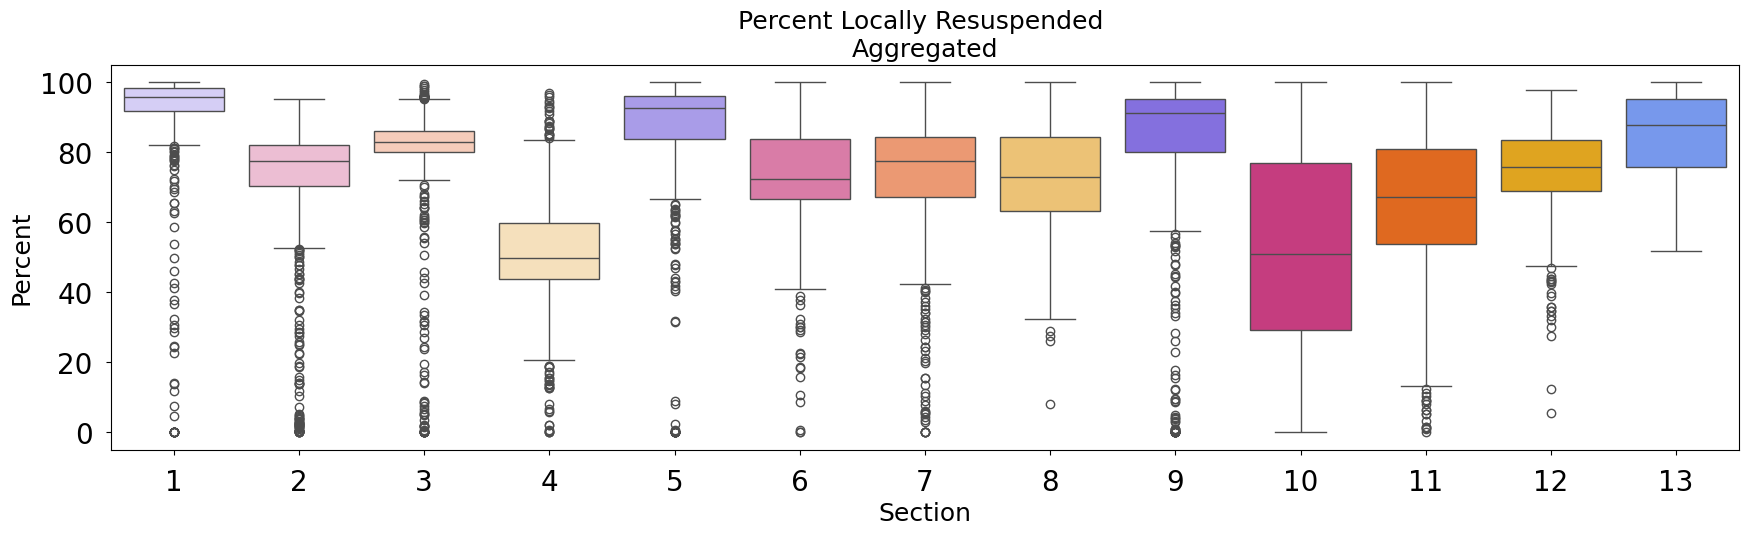

In [22]:
# Make the figure 
fig2, ax2 = plt.subplots(figsize=(21,5))

# Plot the data as a boxplot
s2 = sns.boxplot(data=local_resusp_agg_all_sections, ax=ax2, palette=seabed_section_colors)

# All
ax2.set_xticklabels(['1', '2', '3', '4', '5', 
                 '6', '7', '8', '9', '10',
                 '11', '12', '13'])

ax2.set_xlabel('Section', fontsize=fontsize-2)
ax2.set_ylabel('Percent', fontsize=fontsize-2)
ax2.set_title('Percent Locally Resuspended \nAggregated', fontsize=fontsize-2)

Text(0.5, 1.0, 'Time Series of Percent Local Resuspension - Aggregated')

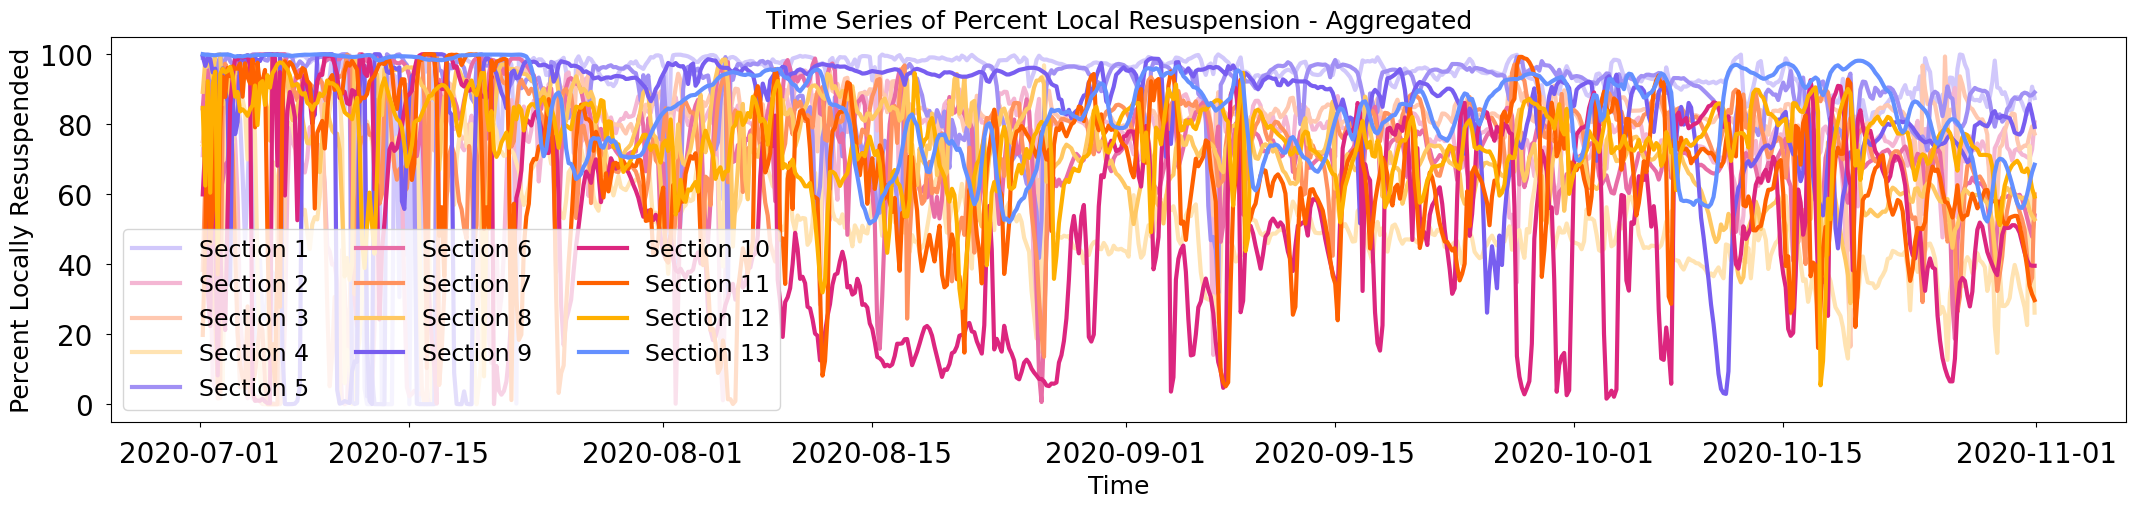

In [23]:
# Try to make a line plot for the sections 

# Make the figure 
fig2, ax2 = plt.subplots(figsize=(26,5))


# Plot each section as a line 
ax2.plot(percent_local_agg.ocean_time, percent_local_agg.percent_local_resuspended_over_time_sec1, color=seabed_section_colors[0], label=section_names_long[0], linewidth=3)
ax2.plot(percent_local_agg.ocean_time, percent_local_agg.percent_local_resuspended_over_time_sec2, color=seabed_section_colors[1], label=section_names_long[1], linewidth=3)
ax2.plot(percent_local_agg.ocean_time, percent_local_agg.percent_local_resuspended_over_time_sec3, color=seabed_section_colors[2], label=section_names_long[2], linewidth=3)
ax2.plot(percent_local_agg.ocean_time, percent_local_agg.percent_local_resuspended_over_time_sec4, color=seabed_section_colors[3], label=section_names_long[3], linewidth=3)
ax2.plot(percent_local_agg.ocean_time, percent_local_agg.percent_local_resuspended_over_time_sec5, color=seabed_section_colors[4], label=section_names_long[4], linewidth=3)
ax2.plot(percent_local_agg.ocean_time, percent_local_agg.percent_local_resuspended_over_time_sec6, color=seabed_section_colors[5], label=section_names_long[5], linewidth=3)
ax2.plot(percent_local_agg.ocean_time, percent_local_agg.percent_local_resuspended_over_time_sec7, color=seabed_section_colors[6], label=section_names_long[6], linewidth=3)
ax2.plot(percent_local_agg.ocean_time, percent_local_agg.percent_local_resuspended_over_time_sec8, color=seabed_section_colors[7], label=section_names_long[7], linewidth=3)
ax2.plot(percent_local_agg.ocean_time, percent_local_agg.percent_local_resuspended_over_time_sec9, color=seabed_section_colors[8], label=section_names_long[8], linewidth=3)
ax2.plot(percent_local_agg.ocean_time, percent_local_agg.percent_local_resuspended_over_time_sec10, color=seabed_section_colors[9], label=section_names_long[9], linewidth=3)
ax2.plot(percent_local_agg.ocean_time, percent_local_agg.percent_local_resuspended_over_time_sec11, color=seabed_section_colors[10], label=section_names_long[10], linewidth=3)
ax2.plot(percent_local_agg.ocean_time, percent_local_agg.percent_local_resuspended_over_time_sec12, color=seabed_section_colors[11], label=section_names_long[11], linewidth=3)
ax2.plot(percent_local_agg.ocean_time, percent_local_agg.percent_local_resuspended_over_time_sec13, color=seabed_section_colors[12], label=section_names_long[12], linewidth=3)



# Label the plot
ax2.set_xlabel('Time', fontsize=fontsize-2)
ax2.set_ylabel('Percent Locally Resuspended', fontsize=fontsize-2)
ax2.legend(fontsize=fontsize-3, ncol=3)
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set a title
ax2.set_title('Time Series of Percent Local Resuspension - Aggregated', fontsize=fontsize-2)

/projects/brun1463/code-server/tmp/ipykernel_1266083/505853716.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2[1].set_xticklabels(['1', '2', '3', '4', '5',


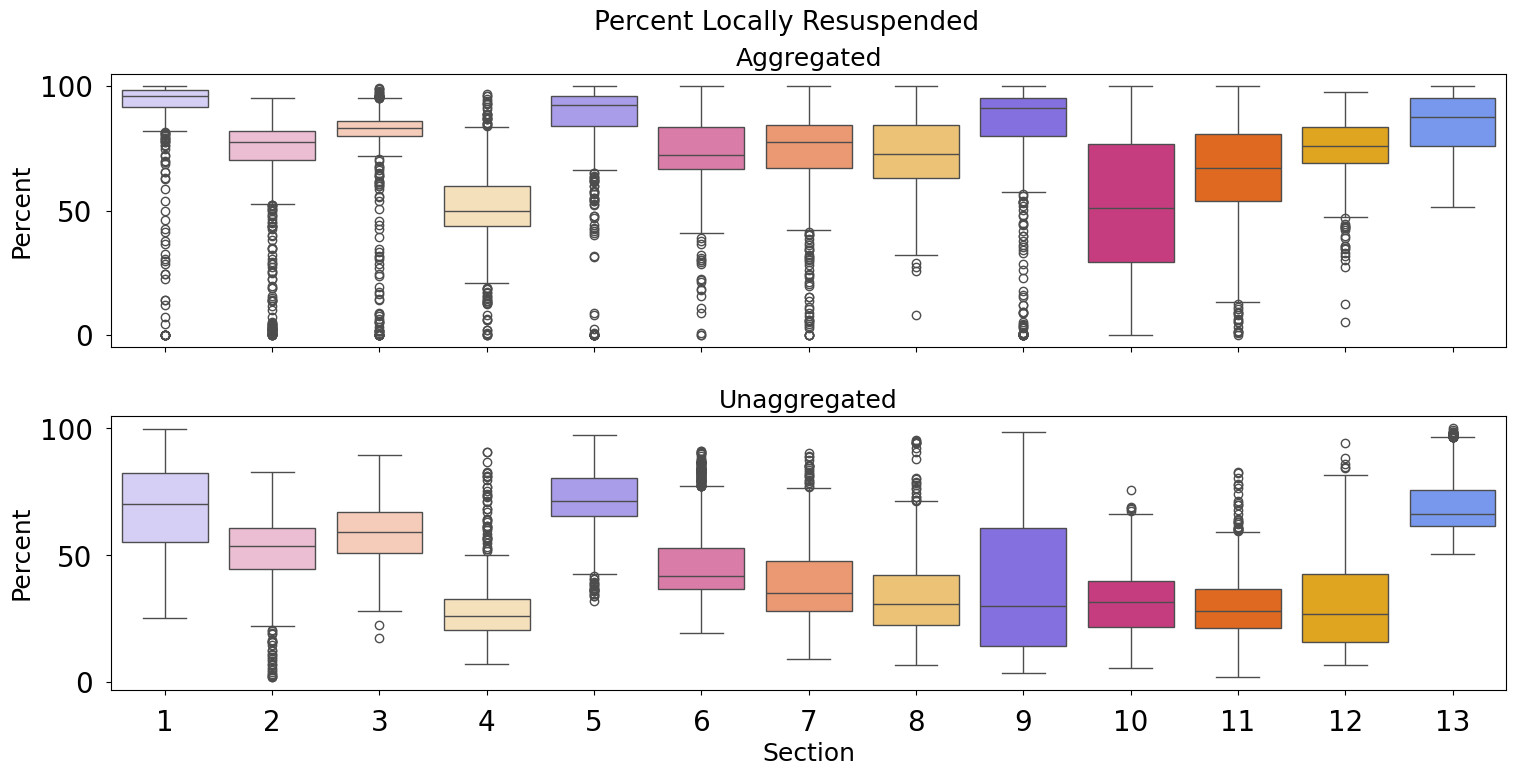

In [24]:
# Make a combo plot of the box and whiskers 
# Make the figure 
fig2, ax2 = plt.subplots(2, figsize=(18,8))

# Plot the data as a boxplot
s2 = sns.boxplot(data=local_resusp_agg_all_sections, ax=ax2[0], palette=seabed_section_colors)
s3 = sns.boxplot(data=local_resusp_unag_all_sections, ax=ax2[1], palette=seabed_section_colors)

# All
ax2[1].set_xticklabels(['1', '2', '3', '4', '5', 
                 '6', '7', '8', '9', '10',
                 '11', '12', '13'])
plt.setp(ax2[0].get_xticklabels(), visible=False)

ax2[1].set_xlabel('Section', fontsize=fontsize-2)
ax2[0].set_ylabel('Percent', fontsize=fontsize-2)
ax2[1].set_ylabel('Percent', fontsize=fontsize-2)
fig2.suptitle('Percent Locally Resuspended', x=0.5, y=0.96, fontsize=fontsize-1)
ax2[0].set_title('Aggregated', fontsize=fontsize-2)
ax2[1].set_title('Unaggregated', fontsize=fontsize-2)

fig2.subplots_adjust(hspace=0.25)

# Save the figure 
#plt.savefig('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Scripts/Analysis/Percent_local_resuspension/percent_local_agg_unag_subplots_001.png')

In [25]:
# Try a side by side version instead? Might make it clearer...
# Make a new dataset that is the first 7 sections for both versions 
local_resusp_unag_agg_secs_1_7 = [percent_local_agg.percent_local_resuspended_over_time_sec1, percent_local_unag.percent_local_resuspended_over_time_sec1,
                                  percent_local_agg.percent_local_resuspended_over_time_sec2, percent_local_unag.percent_local_resuspended_over_time_sec2,
                                  percent_local_agg.percent_local_resuspended_over_time_sec3, percent_local_unag.percent_local_resuspended_over_time_sec3,
                                  percent_local_agg.percent_local_resuspended_over_time_sec4, percent_local_unag.percent_local_resuspended_over_time_sec4,
                                  percent_local_agg.percent_local_resuspended_over_time_sec5, percent_local_unag.percent_local_resuspended_over_time_sec5,
                                  percent_local_agg.percent_local_resuspended_over_time_sec6, percent_local_unag.percent_local_resuspended_over_time_sec6,
                                  percent_local_agg.percent_local_resuspended_over_time_sec7, percent_local_unag.percent_local_resuspended_over_time_sec7]

# Make another dataset that is the last 6 for both versions 
local_resusp_unag_agg_secs_8_13 = [percent_local_agg.percent_local_resuspended_over_time_sec8, percent_local_unag.percent_local_resuspended_over_time_sec8,
                                  percent_local_agg.percent_local_resuspended_over_time_sec9, percent_local_unag.percent_local_resuspended_over_time_sec9,
                                  percent_local_agg.percent_local_resuspended_over_time_sec10, percent_local_unag.percent_local_resuspended_over_time_sec10,
                                  percent_local_agg.percent_local_resuspended_over_time_sec11, percent_local_unag.percent_local_resuspended_over_time_sec11,
                                  percent_local_agg.percent_local_resuspended_over_time_sec12, percent_local_unag.percent_local_resuspended_over_time_sec12,
                                  percent_local_agg.percent_local_resuspended_over_time_sec13, percent_local_unag.percent_local_resuspended_over_time_sec13]

In [26]:
print(local_resusp_unag_agg_secs_1_7[0][0:10])
print(local_resusp_unag_agg_secs_8_13[0][0:10])

<xarray.DataArray 'percent_local_resuspended_over_time_sec1' (ocean_time: 10)> Size: 80B
array([      nan, 99.957049, 99.946773, 99.930571, 99.691985, 99.589864,
       96.961523, 79.215645, 92.396046, 99.965151])
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 80B 2020-07-01T01:00:00 ... 2020-...
<xarray.DataArray 'percent_local_resuspended_over_time_sec8' (ocean_time: 10)> Size: 80B
array([      nan, 89.245147, 98.08941 , 96.632826, 98.609474, 93.07986 ,
       99.584679, 99.812358, 99.947709, 85.698754])
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 80B 2020-07-01T01:00:00 ... 2020-...


In [27]:
# Make list of colors to use for plots - doubled for plotting things next
# to each other 
seabed_section_colors_doubles_secs_1_7 = ['#D1C8FB', '#D1C8FB', '#F4B6D3', '#F4B6D3',  '#FFC8B0', '#FFC8B0',
                                 '#FFE3B2', '#FFE3B2', '#A190F4', '#A190F4', '#E86DA6',
                         '#E86DA6', '#FF925F', '#FF925F']

seabed_section_colors_doubles_secs_8_13 = ['#FFC863', '#FFC863', '#785EF0',
                         '#785EF0', '#DC267F', '#DC267F', '#FF6100', '#FF6100', '#FFB000', 
                         '#FFB000', '#6490FF', '#6490FF']

The plots down here randomly started plotting wrong so must've updated a package or something and it make this not work soooo going to add some ChatGPT fixes to get this to plot correctly again...

In [28]:
# chatGPT help with reformatting data so that seaborn likes it
# Helper function to build long-form DataFrame
def build_longform_df(series_list, section_labels):
    data = []
    labels = []
    for label, series in zip(section_labels, series_list):
        if series is not None:
            values = series.values.flatten()  # convert to 1D numpy array
            if len(values) > 0:
                data.extend(values)
                labels.extend([label] * len(values))
    return pd.DataFrame({'Section': labels, 'Percent': data})

# Define section labels
labels_1_7 = ['Sec1_Agg', 'Sec1_Unag', 'Sec2_Agg', 'Sec2_Unag',
              'Sec3_Agg', 'Sec3_Unag', 'Sec4_Agg', 'Sec4_Unag',
              'Sec5_Agg', 'Sec5_Unag', 'Sec6_Agg', 'Sec6_Unag',
              'Sec7_Agg', 'Sec7_Unag']
labels_8_13 = ['Sec8_Agg', 'Sec8_Unag', 'Sec9_Agg', 'Sec9_Unag', 
              'Sec10_Agg', 'Sec10_Unag', 'Sec11_Agg', 'Sec11_Unag', 
              'Sec12_Agg', 'Sec12_Unag', 'Sec13_Agg', 'Sec13_Unag']

# Build long-form DataFrames
local_resusp_unag_agg_secs_1_7 = build_longform_df(local_resusp_unag_agg_secs_1_7, labels_1_7)
local_resusp_unag_agg_secs_8_13 = build_longform_df(local_resusp_unag_agg_secs_8_13, labels_8_13)

/projects/brun1463/code-server/tmp/ipykernel_1266083/3082194493.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=local_resusp_unag_agg_secs_1_7, x='Section', y='Percent', ax=ax2[0], palette=seabed_section_colors_doubles_secs_1_7)
/projects/brun1463/code-server/tmp/ipykernel_1266083/3082194493.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=local_resusp_unag_agg_secs_8_13,  x='Section', y='Percent', ax=ax2[1], palette=seabed_section_colors_doubles_secs_8_13)
/projects/brun1463/code-server/tmp/ipykernel_1266083/3082194493.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels

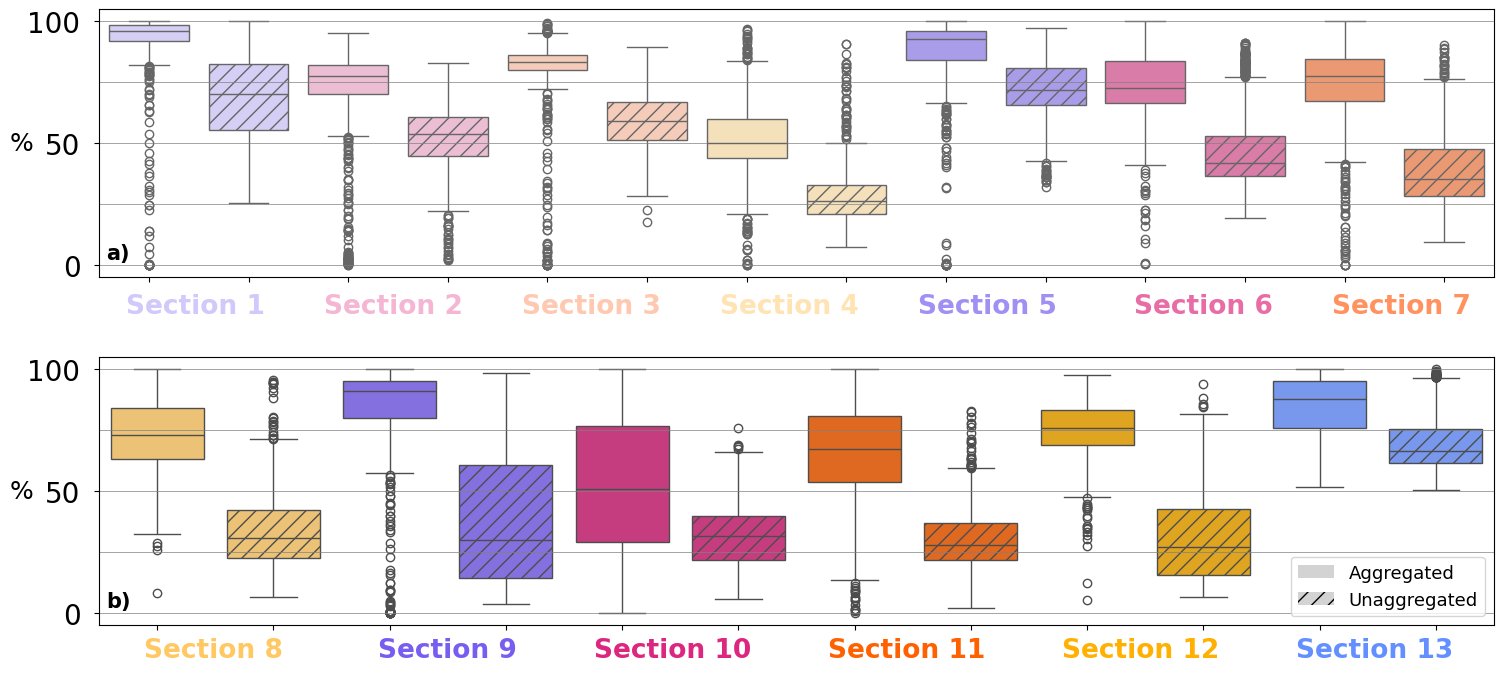

In [29]:
# Create subplots
fig2, ax2 = plt.subplots(2, figsize=(18, 8))

# Plot using seaborn
sns.boxplot(data=local_resusp_unag_agg_secs_1_7, x='Section', y='Percent', ax=ax2[0], palette=seabed_section_colors_doubles_secs_1_7)
sns.boxplot(data=local_resusp_unag_agg_secs_8_13,  x='Section', y='Percent', ax=ax2[1], palette=seabed_section_colors_doubles_secs_8_13)

# Add horizontal lines at 0, 25, 50, 75, 100
for ax in ax2:
    for y in [0, 25, 50, 75, 100]:
        ax.axhline(y=y, linestyle='-', color='gray', linewidth=0.5)

# Hide x-axis labels
for ax in ax2:
    ax.set_xticklabels(ax.get_xticklabels(), visible=False)
    ax.set_xlabel('')

# Set y-axis labels
for ax in ax2:
    ax.set_ylabel('%', fontsize=fontsize - 2, rotation=0, va='center')

# Main title
#fig2.suptitle('Percent Locally Resuspended', x=0.5, y=0.93, fontsize=fontsize - 1)

# Adjust spacing
fig2.subplots_adjust(hspace=0.30)

# Optional: Apply hatching to every unaggregated box
hatch_pattern = '//'
for ax in ax2:
    for i, patch in enumerate(ax.patches):
        if i % 2 == 1:  # unaggregated boxes assumed to be at odd indices
            patch.set_hatch(hatch_pattern)

# # Add manual section labels (adjust y coordinates as needed)
# section_text_positions = {
#     ax2[2]: (0.08, ['Section 1', 'Section 2', 'Section 3', 'Section 4'], 0.08),
#     ax2[1]: (0.35, ['Section 5', 'Section 6', 'Section 7', 'Section 8'], 0.35),
#     ax2[0]: (0.62, ['Section 9', 'Section 10', 'Section 11', 'Section 12'], 0.62)
# }

# for ax, (y_pos, labels, y_text) in section_text_positions.items():
#     for i, label in enumerate(labels):
#         fig2.text(0.19 + 0.19 * i, y_text, label, color=seabed_section_colors[i + (4 * (2 - ax2.tolist().index(ax)))],
#                   fontsize=fontsize - 1, weight='bold')

# Manually place section labels 
fig2.text(0.14, 0.5, 'Section 1', color=seabed_section_colors[0], fontsize=fontsize-1, weight='bold')
fig2.text(0.25, 0.5, 'Section 2', color=seabed_section_colors[1], fontsize=fontsize-1, weight='bold')
fig2.text(0.36, 0.5, 'Section 3', color=seabed_section_colors[2], fontsize=fontsize-1, weight='bold')
fig2.text(0.47, 0.5, 'Section 4', color=seabed_section_colors[3], fontsize=fontsize-1, weight='bold')
fig2.text(0.58, 0.5, 'Section 5', color=seabed_section_colors[4], fontsize=fontsize-1, weight='bold')
fig2.text(0.70, 0.5, 'Section 6', color=seabed_section_colors[5], fontsize=fontsize-1, weight='bold')
fig2.text(0.81, 0.5, 'Section 7', color=seabed_section_colors[6], fontsize=fontsize-1, weight='bold')

fig2.text(0.15, 0.07, 'Section 8', color=seabed_section_colors[7], fontsize=fontsize-1, weight='bold')
fig2.text(0.28, 0.07, 'Section 9', color=seabed_section_colors[8], fontsize=fontsize-1, weight='bold')
fig2.text(0.40, 0.07, 'Section 10', color=seabed_section_colors[9], fontsize=fontsize-1, weight='bold')
fig2.text(0.53, 0.07, 'Section 11', color=seabed_section_colors[10], fontsize=fontsize-1, weight='bold')
fig2.text(0.66, 0.07, 'Section 12', color=seabed_section_colors[11], fontsize=fontsize-1, weight='bold')
fig2.text(0.79, 0.07, 'Section 13', color=seabed_section_colors[12], fontsize=fontsize-1, weight='bold')

# Add legend
solid_patch = mpatches.Patch(facecolor='lightgray', label='Aggregated')
hatched_patch = mpatches.Patch(facecolor='lightgray', hatch='//', label='Unaggregated')
ax2[1].legend(handles=[solid_patch, hatched_patch], fontsize=fontsize - 7, loc='lower right')

# Add subplot labels 
fig2.text(0.129, 0.568, 'a)', color='black', fontsize=fontsize-5, weight='bold')
fig2.text(0.129, 0.132, 'b)', color='black', fontsize=fontsize-5, weight='bold')

plt.show()

/projects/brun1463/code-server/tmp/ipykernel_1266083/3138972556.py:6: UserWarning: The palette list has more values (14) than needed (1), which may not be intended.
  ss2 = sns.boxplot(data=local_resusp_unag_agg_secs_1_7, ax=ax2[0], palette=seabed_section_colors_doubles_secs_1_7)
/projects/brun1463/code-server/tmp/ipykernel_1266083/3138972556.py:7: UserWarning: The palette list has more values (12) than needed (1), which may not be intended.
  s3 = sns.boxplot(data=local_resusp_unag_agg_secs_8_13, ax=ax2[1], palette=seabed_section_colors_doubles_secs_8_13)


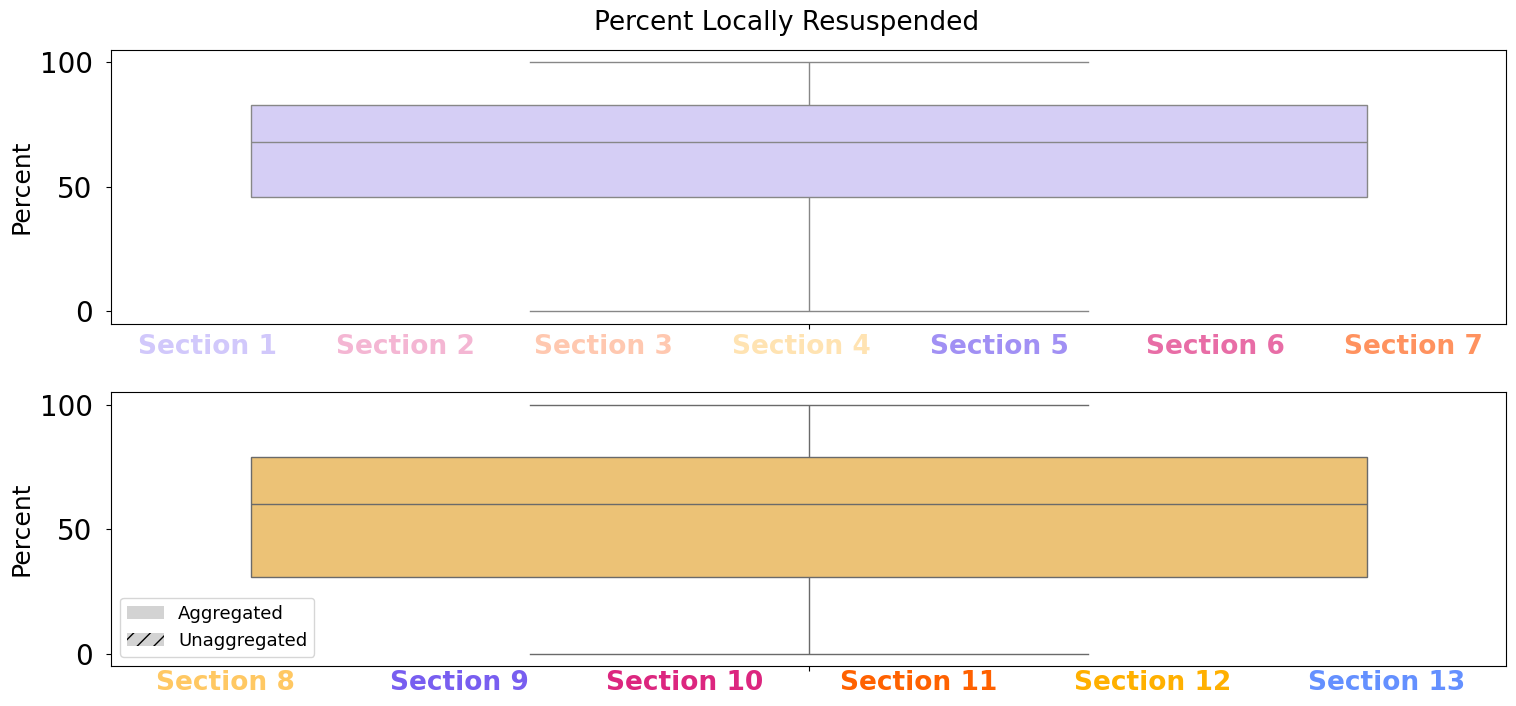

In [30]:
# Make a combo plot of the box and whiskers 
# Make the figure 
fig2, ax2 = plt.subplots(2, figsize=(18,8))

# Plot the data as a boxplot
ss2 = sns.boxplot(data=local_resusp_unag_agg_secs_1_7, ax=ax2[0], palette=seabed_section_colors_doubles_secs_1_7)
s3 = sns.boxplot(data=local_resusp_unag_agg_secs_8_13, ax=ax2[1], palette=seabed_section_colors_doubles_secs_8_13)

# Set hatches to the second/unaggregated data
#hatches = ["/", "o", "*", "\\", "/", "o", "*", "\\", "/", "o", "*", "\\", "/", "o", "*"]
# Set the hatch
hatches = ["/"]
# Loop through patches for sections 1 - 7 
for i, patch in enumerate(ax2[0].patches):
    # Apply to every other box
    if i % 2 == 1:  
        patch.set_hatch(hatches[i // 2 % len(hatches)])  
# Loop through patches for sections 8 - 13 
for i, patch in enumerate(ax2[1].patches):
    # Apply to every other box
    if i % 2 == 1:  
        patch.set_hatch(hatches[i // 2 % len(hatches)])  

# All
#ax2[0].set_xticklabels(['Agg.1', 'Unag.1', 'Agg.2', 'Unag.2', 'Agg.3', 'Unag.3',
    #                    'Agg.4', 'Unag.4', 'Agg.5', 'Unag.5', 'Agg.6', 'Unag.6',
     #                   'Agg.7', 'Unag.7'])
#ax2[0].set_xticklabels(['Sec', '1', 'Sec', '2', 'Sec', '3',
 #                   'Sec', '4', 'Sec', '5', 'Sec', '6',
  #                  'Sec', '7'])
#ax2[1].set_xticklabels(['Agg.8', 'Unag.8', 'Agg.9', 'Unag.9', 'Agg.10', 'Unag.10',
 #                       'Agg.11', 'Unag.11', 'Agg.12', 'Unag.12', 'Agg.13', 'Unag.13'])


plt.setp(ax2[0].get_xticklabels(), visible=False)
plt.setp(ax2[1].get_xticklabels(), visible=False)

#ax2[1].set_xlabel('Section', fontsize=fontsize-2)
ax2[0].set_ylabel('Percent', fontsize=fontsize-2)
ax2[1].set_ylabel('Percent', fontsize=fontsize-2)
fig2.suptitle('Percent Locally Resuspended', x=0.5, y=0.93, fontsize=fontsize-1)
#ax2[0].set_title('Aggregated', fontsize=fontsize-2)
#ax2[1].set_title('Unaggregated', fontsize=fontsize-2)

# Adjust the spacing 
fig2.subplots_adjust(hspace=0.25)


# Manually place section labels 
fig2.text(0.14, 0.5, 'Section 1', color=seabed_section_colors[0], fontsize=fontsize-1, weight='bold')
fig2.text(0.25, 0.5, 'Section 2', color=seabed_section_colors[1], fontsize=fontsize-1, weight='bold')
fig2.text(0.36, 0.5, 'Section 3', color=seabed_section_colors[2], fontsize=fontsize-1, weight='bold')
fig2.text(0.47, 0.5, 'Section 4', color=seabed_section_colors[3], fontsize=fontsize-1, weight='bold')
fig2.text(0.58, 0.5, 'Section 5', color=seabed_section_colors[4], fontsize=fontsize-1, weight='bold')
fig2.text(0.70, 0.5, 'Section 6', color=seabed_section_colors[5], fontsize=fontsize-1, weight='bold')
fig2.text(0.81, 0.5, 'Section 7', color=seabed_section_colors[6], fontsize=fontsize-1, weight='bold')

fig2.text(0.15, 0.08, 'Section 8', color=seabed_section_colors[7], fontsize=fontsize-1, weight='bold')
fig2.text(0.28, 0.08, 'Section 9', color=seabed_section_colors[8], fontsize=fontsize-1, weight='bold')
fig2.text(0.40, 0.08, 'Section 10', color=seabed_section_colors[9], fontsize=fontsize-1, weight='bold')
fig2.text(0.53, 0.08, 'Section 11', color=seabed_section_colors[10], fontsize=fontsize-1, weight='bold')
fig2.text(0.66, 0.08, 'Section 12', color=seabed_section_colors[11], fontsize=fontsize-1, weight='bold')
fig2.text(0.79, 0.08, 'Section 13', color=seabed_section_colors[12], fontsize=fontsize-1, weight='bold')

# Make a legend
# Create the custom legend entries
solid_fill_patch = mpatches.Patch(facecolor='lightgray', label='Aggregated')
hatched_fill_patch = mpatches.Patch(facecolor='lightgray', hatch='//', label='Unaggregated')
plt.legend(handles=[solid_fill_patch, hatched_fill_patch], fontsize=fontsize-7)

# Save the figure
#plt.savefig('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Scripts/Analysis/Percent_local_resuspension/percent_local_agg_unag_side_by_side_001.png')

In [31]:
# Make the same plot as above but with order/placement that 
# mirrors where sections are in the domain
# First remake versions of the data that have it in those orders
# Make a new dataset that is the first 4 sections for both versions 
local_resusp_unag_agg_secs_1_4 = [percent_local_agg.percent_local_resuspended_over_time_sec1, percent_local_unag.percent_local_resuspended_over_time_sec1,
                                  percent_local_agg.percent_local_resuspended_over_time_sec2, percent_local_unag.percent_local_resuspended_over_time_sec2,
                                  percent_local_agg.percent_local_resuspended_over_time_sec3, percent_local_unag.percent_local_resuspended_over_time_sec3,
                                  percent_local_agg.percent_local_resuspended_over_time_sec4, percent_local_unag.percent_local_resuspended_over_time_sec4]
local_resusp_unag_agg_secs_5_8 = [percent_local_agg.percent_local_resuspended_over_time_sec5, percent_local_unag.percent_local_resuspended_over_time_sec5,
                                  percent_local_agg.percent_local_resuspended_over_time_sec6, percent_local_unag.percent_local_resuspended_over_time_sec6,
                                  percent_local_agg.percent_local_resuspended_over_time_sec7, percent_local_unag.percent_local_resuspended_over_time_sec7,
                                  percent_local_agg.percent_local_resuspended_over_time_sec8, percent_local_unag.percent_local_resuspended_over_time_sec8]
local_resusp_unag_agg_secs_9_12 = [percent_local_agg.percent_local_resuspended_over_time_sec9, percent_local_unag.percent_local_resuspended_over_time_sec9,
                                  percent_local_agg.percent_local_resuspended_over_time_sec10, percent_local_unag.percent_local_resuspended_over_time_sec10,
                                  percent_local_agg.percent_local_resuspended_over_time_sec11, percent_local_unag.percent_local_resuspended_over_time_sec11,
                                  percent_local_agg.percent_local_resuspended_over_time_sec12, percent_local_unag.percent_local_resuspended_over_time_sec12]


In [32]:
# Make list of colors to use for plots - doubled for plotting things next
# to each other 
seabed_section_colors_doubles_secs_1_4 = ['#D1C8FB', '#D1C8FB', '#F4B6D3', '#F4B6D3',  '#FFC8B0', '#FFC8B0','#FFE3B2', '#FFE3B2']
seabed_section_colors_doubles_secs_5_8 = ['#A190F4', '#A190F4', '#E86DA6','#E86DA6', '#FF925F', '#FF925F', '#FFC863', '#FFC863']
seabed_section_colors_doubles_secs_9_12 = ['#785EF0', '#785EF0', '#DC267F', '#DC267F', '#FF6100', '#FF6100', '#FFB000', '#FFB000']

In [33]:
# chatGPT help with reformatting data so that seaborn likes it
# Helper function to build long-form DataFrame
def build_longform_df(series_list, section_labels):
    data = []
    labels = []
    for label, series in zip(section_labels, series_list):
        if series is not None:
            values = series.values.flatten()  # convert to 1D numpy array
            if len(values) > 0:
                data.extend(values)
                labels.extend([label] * len(values))
    return pd.DataFrame({'Section': labels, 'Percent': data})

# Define section labels
labels_1_4 = ['Sec1_Agg', 'Sec1_Unag', 'Sec2_Agg', 'Sec2_Unag',
              'Sec3_Agg', 'Sec3_Unag', 'Sec4_Agg', 'Sec4_Unag']
labels_5_8 = ['Sec5_Agg', 'Sec5_Unag', 'Sec6_Agg', 'Sec6_Unag',
              'Sec7_Agg', 'Sec7_Unag', 'Sec8_Agg', 'Sec8_Unag']
labels_9_12 = ['Sec9_Agg', 'Sec9_Unag', 'Sec10_Agg', 'Sec10_Unag',
               'Sec11_Agg', 'Sec11_Unag', 'Sec12_Agg', 'Sec12_Unag']

# Build long-form DataFrames
df_1_4 = build_longform_df(local_resusp_unag_agg_secs_1_4, labels_1_4)
df_5_8 = build_longform_df(local_resusp_unag_agg_secs_5_8, labels_5_8)
df_9_12 = build_longform_df(local_resusp_unag_agg_secs_9_12, labels_9_12)

/projects/brun1463/code-server/tmp/ipykernel_1266083/3310765436.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_9_12, x='Section', y='Percent', ax=ax2[0], palette=seabed_section_colors_doubles_secs_9_12)
/projects/brun1463/code-server/tmp/ipykernel_1266083/3310765436.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_5_8,  x='Section', y='Percent', ax=ax2[1], palette=seabed_section_colors_doubles_secs_5_8)
/projects/brun1463/code-server/tmp/ipykernel_1266083/3310765436.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(

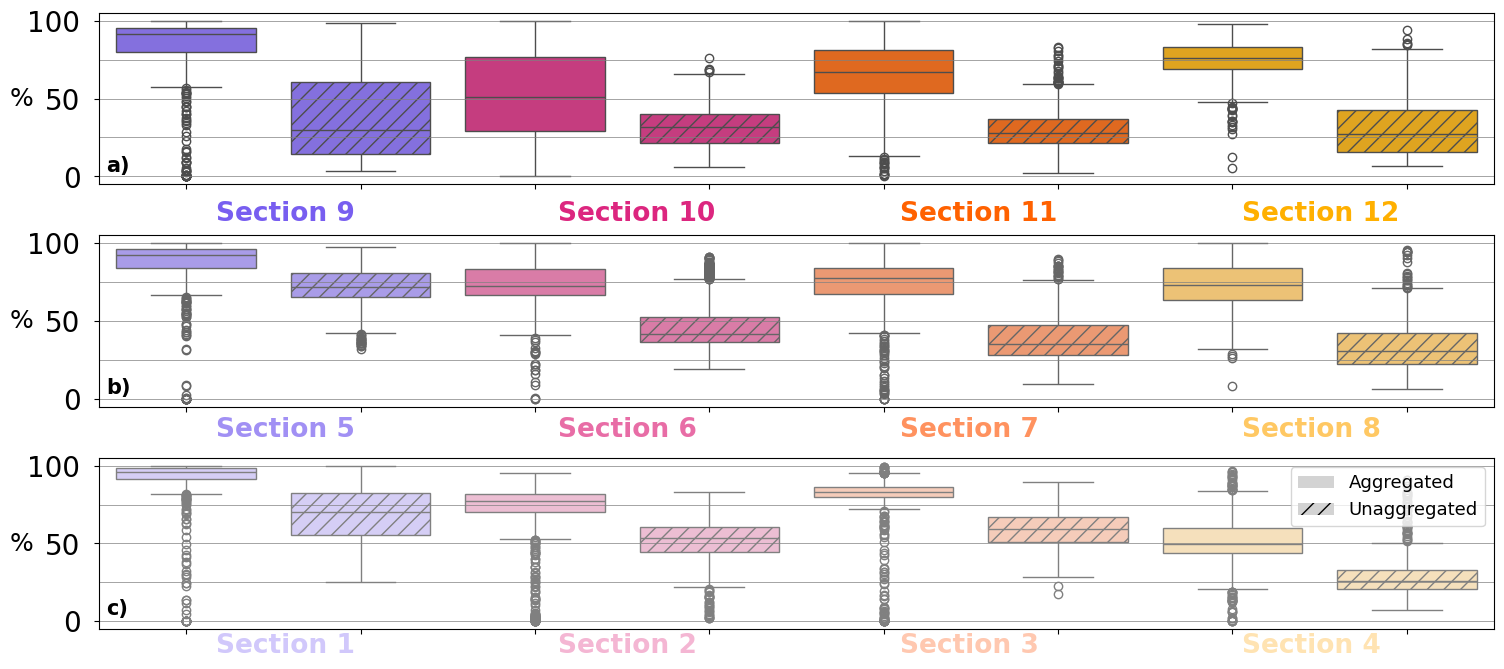

In [34]:
# New plotting + some ChatGPT things 

# Create subplots
fig2, ax2 = plt.subplots(3, figsize=(18, 8))

# Plot using seaborn
sns.boxplot(data=df_9_12, x='Section', y='Percent', ax=ax2[0], palette=seabed_section_colors_doubles_secs_9_12)
sns.boxplot(data=df_5_8,  x='Section', y='Percent', ax=ax2[1], palette=seabed_section_colors_doubles_secs_5_8)
sns.boxplot(data=df_1_4,  x='Section', y='Percent', ax=ax2[2], palette=seabed_section_colors_doubles_secs_1_4)

# Add horizontal lines at 0, 25, 50, 75, 100
for ax in ax2:
    for y in [0, 25, 50, 75, 100]:
        ax.axhline(y=y, linestyle='-', color='gray', linewidth=0.5)

# Hide x-axis labels
for ax in ax2:
    ax.set_xticklabels(ax.get_xticklabels(), visible=False)
    ax.set_xlabel('')

# Set y-axis labels
for ax in ax2:
    ax.set_ylabel('%', fontsize=fontsize - 2, rotation=0, va='center')

# Main title
#fig2.suptitle('Percent Locally Resuspended', x=0.5, y=0.93, fontsize=fontsize - 1)

# Adjust spacing
fig2.subplots_adjust(hspace=0.30)

# Optional: Apply hatching to every unaggregated box
hatch_pattern = '//'
for ax in ax2:
    for i, patch in enumerate(ax.patches):
        if i % 2 == 1:  # unaggregated boxes assumed to be at odd indices
            patch.set_hatch(hatch_pattern)

# Add manual section labels (adjust y coordinates as needed)
section_text_positions = {
    ax2[2]: (0.08, ['Section 1', 'Section 2', 'Section 3', 'Section 4'], 0.08),
    ax2[1]: (0.35, ['Section 5', 'Section 6', 'Section 7', 'Section 8'], 0.35),
    ax2[0]: (0.62, ['Section 9', 'Section 10', 'Section 11', 'Section 12'], 0.62)
}

for ax, (y_pos, labels, y_text) in section_text_positions.items():
    for i, label in enumerate(labels):
        fig2.text(0.19 + 0.19 * i, y_text, label, color=seabed_section_colors[i + (4 * (2 - ax2.tolist().index(ax)))],
                  fontsize=fontsize - 1, weight='bold')

# Add legend
solid_patch = mpatches.Patch(facecolor='lightgray', label='Aggregated')
hatched_patch = mpatches.Patch(facecolor='lightgray', hatch='//', label='Unaggregated')
ax2[2].legend(handles=[solid_patch, hatched_patch], fontsize=fontsize - 7, loc='upper right')

# Add subplot labels 
fig2.text(0.129, 0.682, 'a)', color='black', fontsize=fontsize-5, weight='bold')
fig2.text(0.129, 0.404, 'b)', color='black', fontsize=fontsize-5, weight='bold')
fig2.text(0.129, 0.128, 'c)', color='black', fontsize=fontsize-5, weight='bold')

plt.show()

/projects/brun1463/code-server/tmp/ipykernel_1266083/2244749173.py:5: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  s4 = sns.boxplot(data=local_resusp_unag_agg_secs_1_4, ax=ax2[2], palette=seabed_section_colors_doubles_secs_1_4)
/projects/brun1463/code-server/tmp/ipykernel_1266083/2244749173.py:6: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  s5 = sns.boxplot(data=local_resusp_unag_agg_secs_5_8, ax=ax2[1], palette=seabed_section_colors_doubles_secs_5_8)
/projects/brun1463/code-server/tmp/ipykernel_1266083/2244749173.py:7: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  s6 = sns.boxplot(data=local_resusp_unag_agg_secs_9_12, ax=ax2[0], palette=seabed_section_colors_doubles_secs_9_12)
/projects/brun1463/code-server/tmp/ipykernel_1266083/2244749173.py:75: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input 

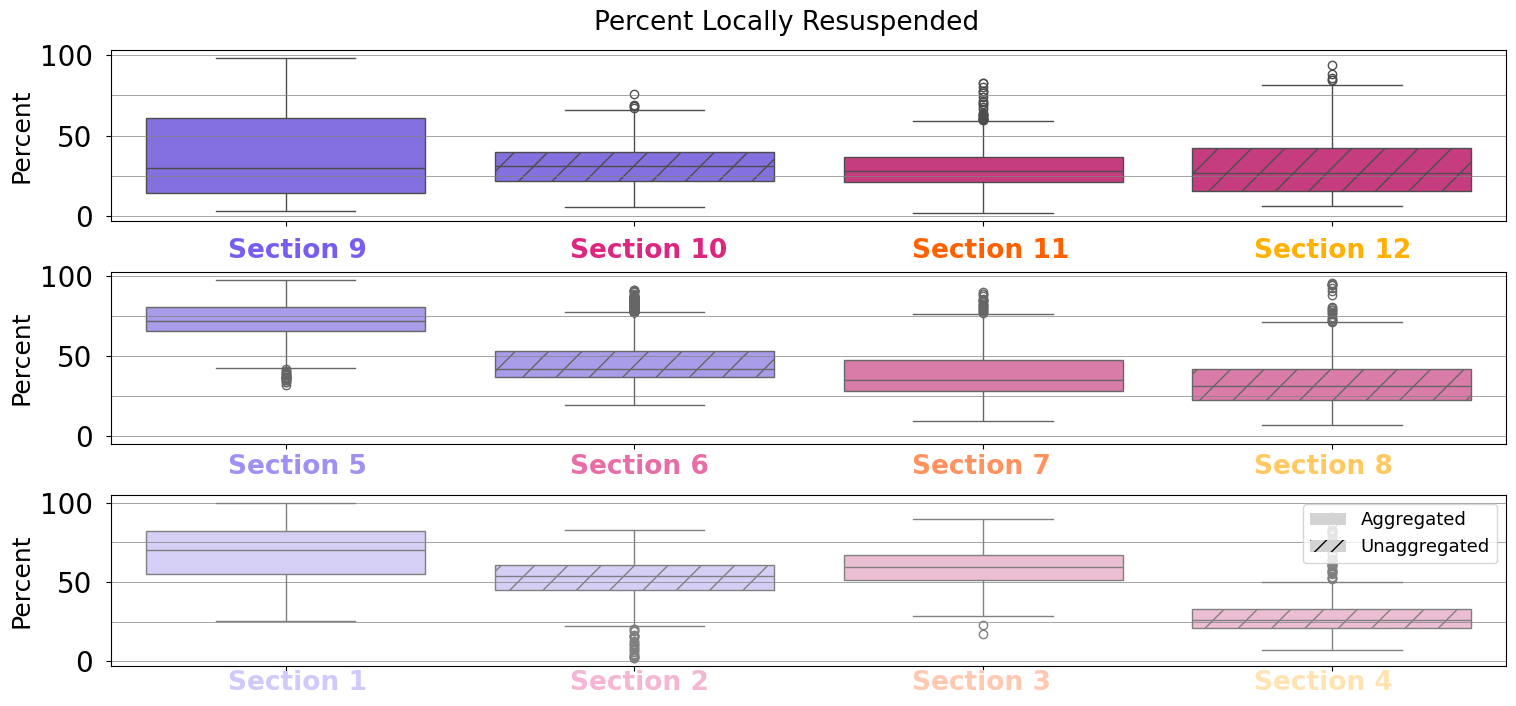

In [35]:
# Make the figure 
fig2, ax2 = plt.subplots(3, figsize=(18,8))

# Plot the data as a boxplot
s4 = sns.boxplot(data=local_resusp_unag_agg_secs_1_4, ax=ax2[2], palette=seabed_section_colors_doubles_secs_1_4)
s5 = sns.boxplot(data=local_resusp_unag_agg_secs_5_8, ax=ax2[1], palette=seabed_section_colors_doubles_secs_5_8)
s6 = sns.boxplot(data=local_resusp_unag_agg_secs_9_12, ax=ax2[0], palette=seabed_section_colors_doubles_secs_9_12)

# Set hatches to the second/unaggregated data
#hatches = ["/", "o", "*", "\\", "/", "o", "*", "\\", "/", "o", "*", "\\", "/", "o", "*"]
# Set the hatch
hatches = ["/"]
# Loop through patches for sections 1 - 7 
for i, patch in enumerate(ax2[0].patches):
    # Apply to every other box
    if i % 2 == 1:  
        patch.set_hatch(hatches[i // 2 % len(hatches)])  
# Loop through patches for sections 8 - 13 
for i, patch in enumerate(ax2[1].patches):
    # Apply to every other box
    if i % 2 == 1:  
        patch.set_hatch(hatches[i // 2 % len(hatches)])  
for i, patch in enumerate(ax2[2].patches):
    # Apply to every other box
    if i % 2 == 1:  
        patch.set_hatch(hatches[i // 2 % len(hatches)]) 

# All
#ax2[0].set_xticklabels(['Agg.1', 'Unag.1', 'Agg.2', 'Unag.2', 'Agg.3', 'Unag.3',
    #                    'Agg.4', 'Unag.4', 'Agg.5', 'Unag.5', 'Agg.6', 'Unag.6',
     #                   'Agg.7', 'Unag.7'])
#ax2[0].set_xticklabels(['Sec', '1', 'Sec', '2', 'Sec', '3',
 #                   'Sec', '4', 'Sec', '5', 'Sec', '6',
  #                  'Sec', '7'])
#ax2[1].set_xticklabels(['Agg.8', 'Unag.8', 'Agg.9', 'Unag.9', 'Agg.10', 'Unag.10',
 #                       'Agg.11', 'Unag.11', 'Agg.12', 'Unag.12', 'Agg.13', 'Unag.13'])


plt.setp(ax2[0].get_xticklabels(), visible=False)
plt.setp(ax2[1].get_xticklabels(), visible=False)
plt.setp(ax2[2].get_xticklabels(), visible=False)

#ax2[1].set_xlabel('Section', fontsize=fontsize-2)
ax2[0].set_ylabel('Percent', fontsize=fontsize-2)
ax2[1].set_ylabel('Percent', fontsize=fontsize-2)
ax2[2].set_ylabel('Percent', fontsize=fontsize-2)
fig2.suptitle('Percent Locally Resuspended', x=0.5, y=0.93, fontsize=fontsize-1)
#ax2[0].set_title('Aggregated', fontsize=fontsize-2)
#ax2[1].set_title('Unaggregated', fontsize=fontsize-2)

# Adjust the spacing 
fig2.subplots_adjust(hspace=0.30)


# Manually place section labels 
fig2.text(0.19, 0.08, 'Section 1', color=seabed_section_colors[0], fontsize=fontsize-1, weight='bold')
fig2.text(0.38, 0.08, 'Section 2', color=seabed_section_colors[1], fontsize=fontsize-1, weight='bold')
fig2.text(0.57, 0.08, 'Section 3', color=seabed_section_colors[2], fontsize=fontsize-1, weight='bold')
fig2.text(0.76, 0.08, 'Section 4', color=seabed_section_colors[3], fontsize=fontsize-1, weight='bold')

fig2.text(0.19, 0.35, 'Section 5', color=seabed_section_colors[4], fontsize=fontsize-1, weight='bold')
fig2.text(0.38, 0.35, 'Section 6', color=seabed_section_colors[5], fontsize=fontsize-1, weight='bold')
fig2.text(0.57, 0.35, 'Section 7', color=seabed_section_colors[6], fontsize=fontsize-1, weight='bold')
fig2.text(0.76, 0.35, 'Section 8', color=seabed_section_colors[7], fontsize=fontsize-1, weight='bold')

fig2.text(0.19, 0.62, 'Section 9', color=seabed_section_colors[8], fontsize=fontsize-1, weight='bold')
fig2.text(0.38, 0.62, 'Section 10', color=seabed_section_colors[9], fontsize=fontsize-1, weight='bold')
fig2.text(0.57, 0.62, 'Section 11', color=seabed_section_colors[10], fontsize=fontsize-1, weight='bold')
fig2.text(0.76, 0.62, 'Section 12', color=seabed_section_colors[11], fontsize=fontsize-1, weight='bold')

# Make a legend
# Create the custom legend entries
solid_fill_patch = mpatches.Patch(facecolor='lightgray', label='Aggregated')
hatched_fill_patch = mpatches.Patch(facecolor='lightgray', hatch='//', label='Unaggregated')
plt.legend(s4, handles=[solid_fill_patch, hatched_fill_patch], fontsize=fontsize-7, loc='upper right')

# Add bars for 25, 50, 75 percent
ax2[0].axhline(y=0, linestyle='-', color='gray', linewidth=0.5)
ax2[0].axhline(y=25, linestyle='-', color='gray', linewidth=0.5)
ax2[0].axhline(y=50, linestyle='-', color='gray', linewidth=0.5)
ax2[0].axhline(y=75, linestyle='-', color='gray', linewidth=0.5)
ax2[0].axhline(y=100, linestyle='-', color='gray', linewidth=0.5)

ax2[1].axhline(y=0, linestyle='-', color='gray', linewidth=0.5)
ax2[1].axhline(y=25, linestyle='-', color='gray', linewidth=0.5)
ax2[1].axhline(y=50, linestyle='-', color='gray', linewidth=0.5)
ax2[1].axhline(y=75, linestyle='-', color='gray', linewidth=0.5)
ax2[1].axhline(y=100, linestyle='-', color='gray', linewidth=0.5)

ax2[2].axhline(y=0, linestyle='-', color='gray', linewidth=0.5)
ax2[2].axhline(y=25, linestyle='-', color='gray', linewidth=0.5)
ax2[2].axhline(y=50, linestyle='-', color='gray', linewidth=0.5)
ax2[2].axhline(y=75, linestyle='-', color='gray', linewidth=0.5)
ax2[2].axhline(y=100, linestyle='-', color='gray', linewidth=0.5)

# Save the figure
#plt.savefig('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Scripts/Analysis/Percent_local_resuspension/percent_local_agg_unag_side_by_side_001.png')

#### Stats!

In [39]:
# Print the average/mean percent of local resuspension the is aggregated
# and unaggregated mud for all sections averaged together 

# Make a function to calculate the means
def get_mean_local_resusp(agg_data, unag_data, section):
    """
    The purpose of this function is to take a given 
    data set of the percentages for both aggregated and 
    unaggregated mud and fund the mean.

    Inputs: 
    - section: String of the section (ex: 'Section 1')
    - agg_data: Data for the percent of SSC that is local resuspension 
                for aggregated mud in a given section
    - unag_data: Data for the percent of SSC that is local resuspension 
                for unaggregated mud in a given section

    Outputs:
    - sec_mean_agg: Mean percentage of local resuspension that is 
                    aggregated mud for a given section
    - sec_mean_unag: Mean percentage of local resuspension that is 
                    unaggregated mud for a given section

    """
    # Print the section
    print(section)

    # Find the mean
    sec_mean_agg = np.mean(agg_data)
    sec_mean_unag = np.mean(unag_data)

    # Print the means
    print('mean_agg: ', sec_mean_agg.values)
    print('mean_unag: ', sec_mean_unag.values)

    # Return these means 
    return(sec_mean_agg, sec_mean_unag)



In [40]:
# Call the function for each section to get the means
sec1_mean_agg, sec1_mean_unag = get_mean_local_resusp(percent_local_agg.percent_local_resuspended_over_time_sec1, percent_local_unag.percent_local_resuspended_over_time_sec1, 'Section 1')
sec2_mean_agg, sec2_mean_unag = get_mean_local_resusp(percent_local_agg.percent_local_resuspended_over_time_sec2, percent_local_unag.percent_local_resuspended_over_time_sec2, 'Section 2')
sec3_mean_agg, sec3_mean_unag = get_mean_local_resusp(percent_local_agg.percent_local_resuspended_over_time_sec3, percent_local_unag.percent_local_resuspended_over_time_sec3, 'Section 3')
sec4_mean_agg, sec4_mean_unag = get_mean_local_resusp(percent_local_agg.percent_local_resuspended_over_time_sec4, percent_local_unag.percent_local_resuspended_over_time_sec4, 'Section 4')
sec5_mean_agg, sec5_mean_unag = get_mean_local_resusp(percent_local_agg.percent_local_resuspended_over_time_sec5, percent_local_unag.percent_local_resuspended_over_time_sec5, 'Section 5')
sec6_mean_agg, sec6_mean_unag = get_mean_local_resusp(percent_local_agg.percent_local_resuspended_over_time_sec6, percent_local_unag.percent_local_resuspended_over_time_sec6, 'Section 6')
sec7_mean_agg, sec7_mean_unag = get_mean_local_resusp(percent_local_agg.percent_local_resuspended_over_time_sec7, percent_local_unag.percent_local_resuspended_over_time_sec7, 'Section 7')
sec8_mean_agg, sec8_mean_unag = get_mean_local_resusp(percent_local_agg.percent_local_resuspended_over_time_sec8, percent_local_unag.percent_local_resuspended_over_time_sec8, 'Section 8')
sec9_mean_agg, sec9_mean_unag = get_mean_local_resusp(percent_local_agg.percent_local_resuspended_over_time_sec9, percent_local_unag.percent_local_resuspended_over_time_sec9, 'Section 9')
sec10_mean_agg, sec10_mean_unag = get_mean_local_resusp(percent_local_agg.percent_local_resuspended_over_time_sec10, percent_local_unag.percent_local_resuspended_over_time_sec10, 'Section 10')
sec11_mean_agg, sec11_mean_unag = get_mean_local_resusp(percent_local_agg.percent_local_resuspended_over_time_sec11, percent_local_unag.percent_local_resuspended_over_time_sec11, 'Section 11')
sec12_mean_agg, sec12_mean_unag = get_mean_local_resusp(percent_local_agg.percent_local_resuspended_over_time_sec12, percent_local_unag.percent_local_resuspended_over_time_sec12, 'Section 12')

Section 1
mean_agg:  91.12684876312228
mean_unag:  68.25822041454074
Section 2
mean_agg:  70.70339974090628
mean_unag:  52.0048701304638
Section 3
mean_agg:  79.19467274843582
mean_unag:  59.895325789187105
Section 4
mean_agg:  51.595587237894726
mean_unag:  28.624994570620217
Section 5
mean_agg:  86.70063376407637
mean_unag:  71.26017560107078
Section 6
mean_agg:  74.00848671111258
mean_unag:  48.285117690399396
Section 7
mean_agg:  72.91120933505708
mean_unag:  38.58031998905519
Section 8
mean_agg:  72.9424375775668
mean_unag:  34.676249706494964
Section 9
mean_agg:  83.38442790809394
mean_unag:  37.031966946963024
Section 10
mean_agg:  51.51017597007566
mean_unag:  31.193026613583115
Section 11
mean_agg:  65.77786834091006
mean_unag:  30.395689191410554
Section 12
mean_agg:  74.97335421382095
mean_unag:  31.986970563136023


In [41]:
# Take the mean of these means
mean_agg = np.mean((sec1_mean_agg, sec2_mean_agg, sec3_mean_agg, sec4_mean_agg, sec5_mean_agg, sec6_mean_agg, sec7_mean_agg,
                    sec8_mean_agg, sec9_mean_agg, sec10_mean_agg, sec11_mean_agg, sec12_mean_agg))
mean_unag = np.mean((sec1_mean_unag, sec2_mean_unag, sec3_mean_unag, sec4_mean_unag, sec5_mean_unag, sec6_mean_unag, sec7_mean_unag,
                    sec8_mean_unag, sec9_mean_unag, sec10_mean_unag, sec11_mean_unag, sec12_mean_unag))

# Print this value
print('mean agg: ', mean_agg)
print('mean unag: ', mean_unag)

mean agg:  72.90242519258939
mean unag:  44.34941060057708


In [36]:
percent_local_agg.percent_local_resuspended_over_time_sec1

<xarray.DataArray 'percent_local_resuspended_over_time_sec1' (ocean_time: 738)> Size: 6kB
array([      nan, 99.957049, 99.946773, ..., 86.147017, 90.710494, 87.467648],
      shape=(738,))
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 6kB 2020-07-01T01:00:00 ... 2020-...